# Part I (b) Cats_Dog_Model_Visualization

In this part, we visualize the trained cats_dogs model in which the training process is shown in Part II. The way of interpreting filters is to generate an input image that maximizes the filter output. This allows us to generate an input that activates the filter. We continue to use the visualize_activation function from vis.visualization as the activation maximization visualization method. The final dense layer's activation is maximized and the input image from the second last dense is shown. We also plot input images which maximally optimize the fliters (we chose 10 filters randomly) from each convolutional layer. This part of code is referenced (https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb).

In [1]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from vis.utils import utils
from vis.visualization import get_num_filters

from matplotlib import pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
from keras.models import load_model

model = load_model('/GitHub/CNN-Feature-Visualization/output/cats_and_dogs_small_2.h5')
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

There are total of 4 convolutional layers in which 10 filters are randomly selected as our activation optimization object. From the plot, the difference is not quite obvious, but we can still observe that the convolutional layer 3 and 4 have a deeper color comparing with layer 1 and 2. Also, for conv2d_8 the filters focus more on in detail where the color concentration is centered while conv2d_5 and conv2d_6 color seems spread equally. As a result, there is difference between input images that maximally activate differet layers.

Since our model is trained within a relative small training set, the input images which optimize the activation for  layers do not demostrate detailed information. Therefore, we apply the popular VGG16 model in part (3) to discover more about the input images which optimize the activation.

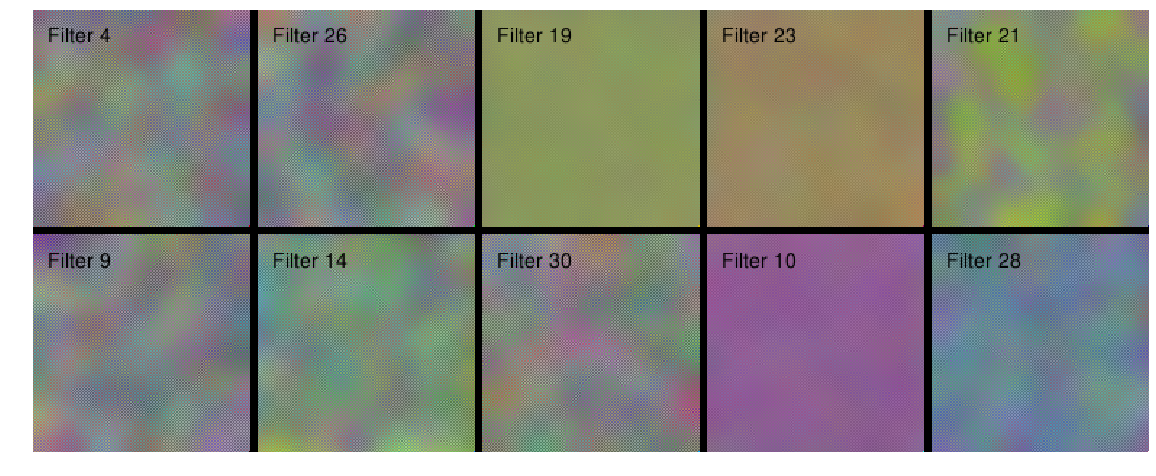

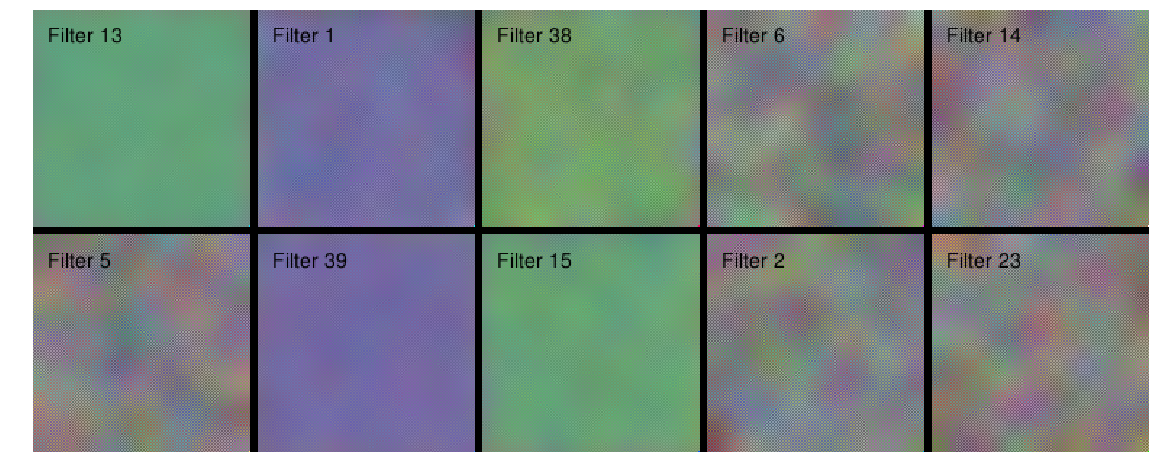

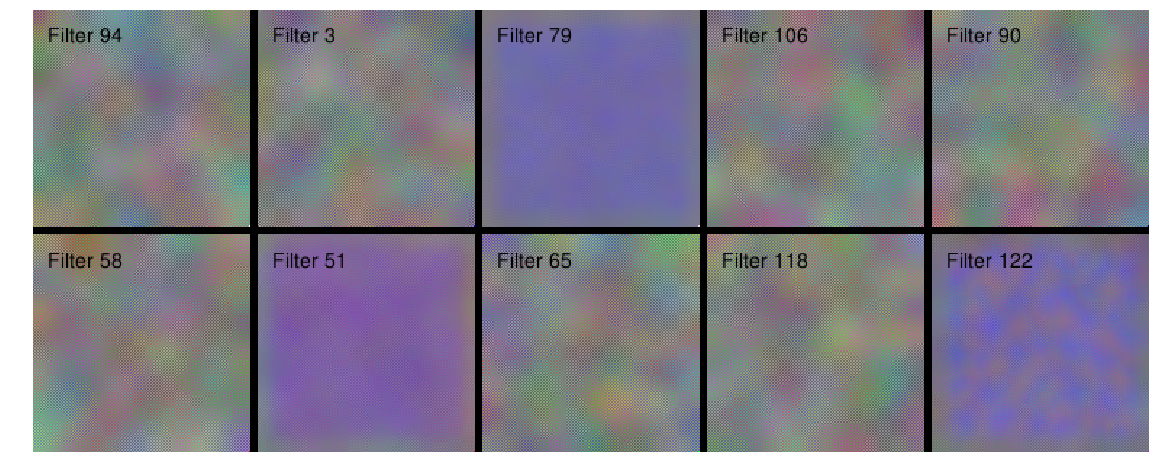

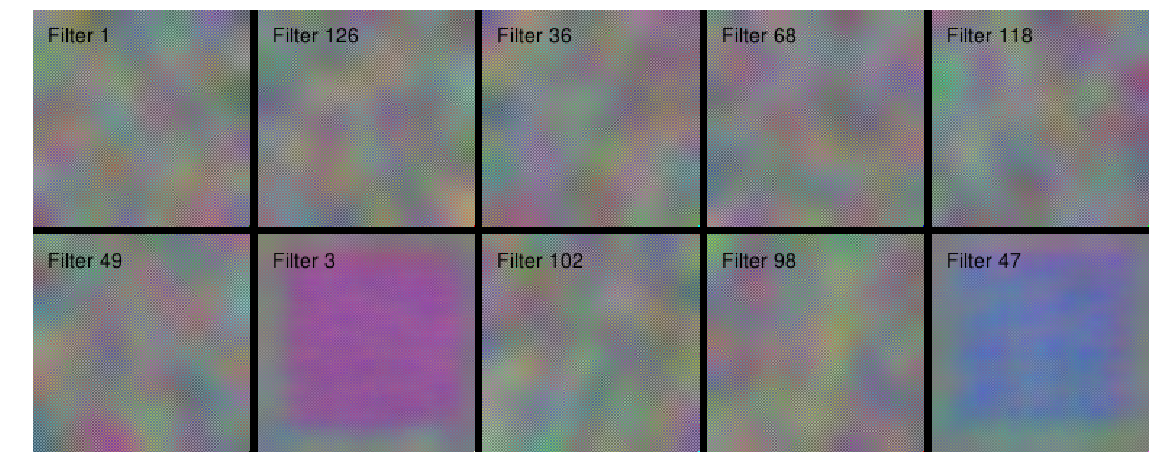

In [3]:
selected_indices = []
for layer_name in ['conv2d_5', 'conv2d_6', 'conv2d_7', 'conv2d_8']:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    stitched = utils.stitch_images(vis_images, cols=5)    
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()


The following two graphs shows the input images that maximally activate the sigmoid dense layer. Since we are doing a binary classification with cats and dogs, the last layer is a sigmoid function instead of softmax. We could observe that both images are quite similar to each other with its color and some feature patterns. However, the two images completely activate different node so that the final output will be 0 for cats and 1 for dogs. As a result, these are two completely different imput images that the CNN classification based on. 


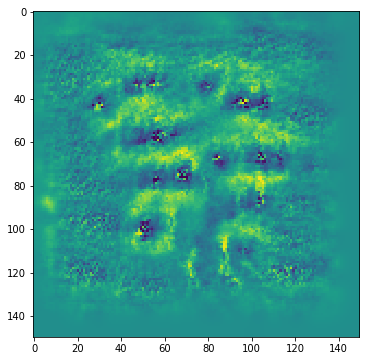

In [12]:
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
#layer_idx = utils.find_layer_idx(model, 'preds')
layer_idx = 11


# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

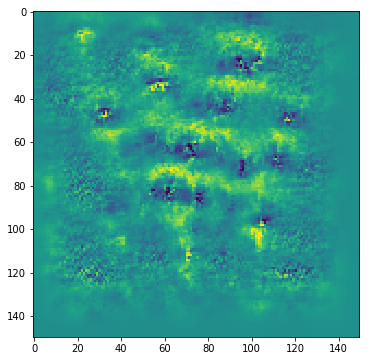

In [13]:
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
#layer_idx = utils.find_layer_idx(model, 'preds')
layer_idx = 11


# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = -1
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])